In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

Загрузка обучающей и тестовой выборок

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


Нормализация входных данных

In [3]:
x_train = x_train / 255
x_test = x_test / 255

Преобразование выходных значений в векторы по категориям

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 25 изображений из обучающей выборки

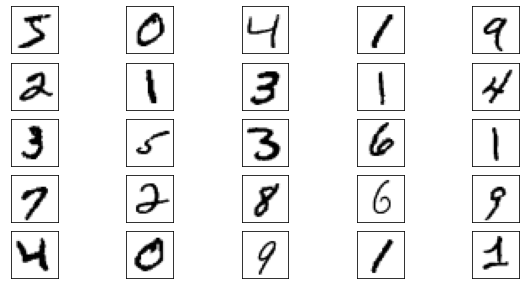

In [5]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Формирование модели НС и вывод её структуры в консоль

In [6]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [7]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

In [8]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9205 - val_loss: 0.1560 - val_accuracy: 0.9560
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1269 - accuracy: 0.9627 - val_loss: 0.1191 - val_accuracy: 0.9653
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9744 - val_loss: 0.1163 - val_accuracy: 0.9631
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.0963 - val_accuracy: 0.9709
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0861 - val_accuracy: 0.9757


In [9]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9761


[0.08084216713905334, 0.9761000275611877]

Проверка распознавания цифр

[[1.15425365e-07 1.19004149e-08 1.63353434e-05 3.90836685e-05
  1.24476011e-11 5.76182870e-08 4.10835069e-14 9.99942899e-01
  1.46497783e-07 1.23982534e-06]]
Распознанная цифра: 7


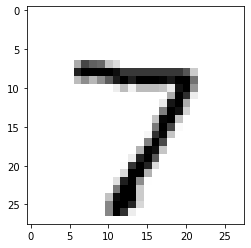

In [15]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( f"Распознанная цифра: {np.argmax(res)}" )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознавание всей тестовой выборки

In [16]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделение неверных вариантов

In [24]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(239, 28, 28)


Вывод первых 25 неверных результатов

Значение сети: 5


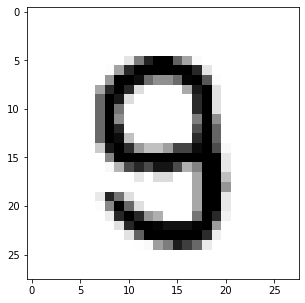

Значение сети: 2


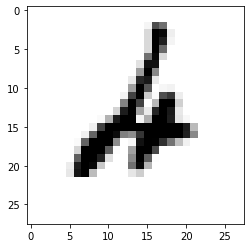

Значение сети: 0


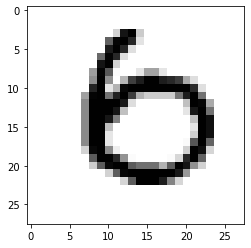

Значение сети: 7


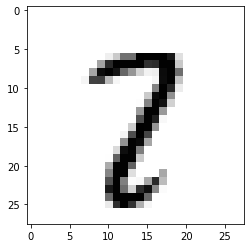

Значение сети: 4


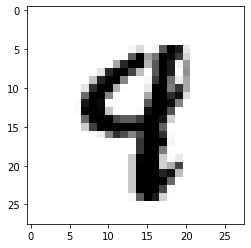

Значение сети: 7


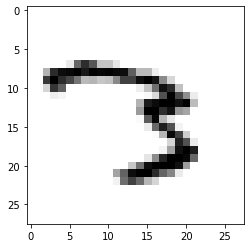

Значение сети: 0


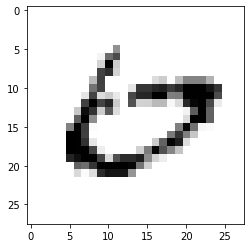

Значение сети: 9


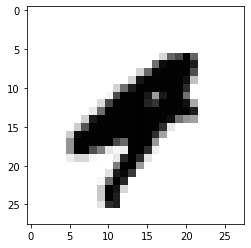

Значение сети: 0


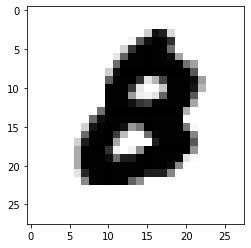

Значение сети: 2


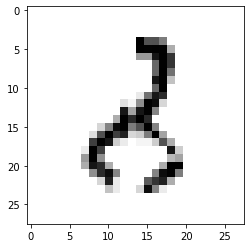

Значение сети: 8


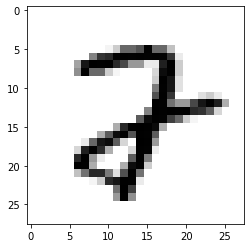

Значение сети: 8


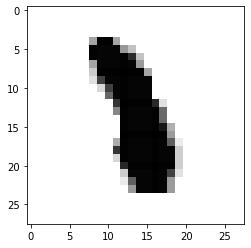

Значение сети: 9


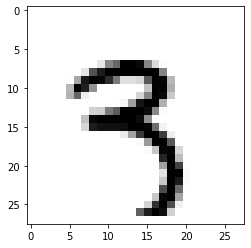

Значение сети: 1


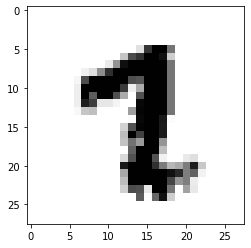

Значение сети: 3


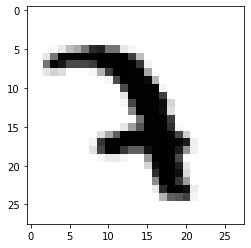

Значение сети: 4


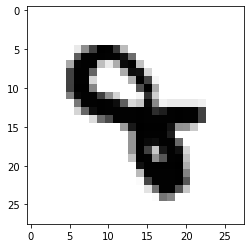

Значение сети: 9


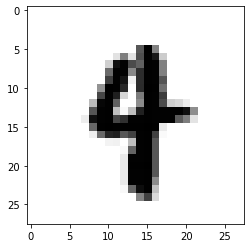

Значение сети: 8


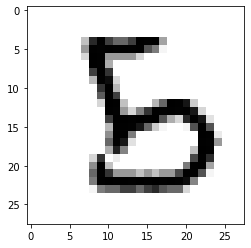

Значение сети: 9


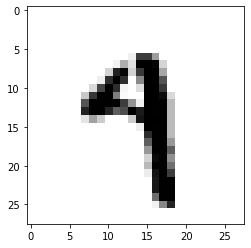

Значение сети: 1


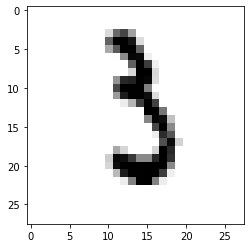

Значение сети: 0


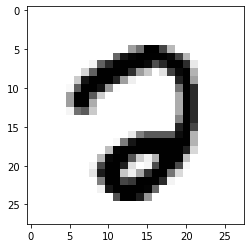

Значение сети: 8


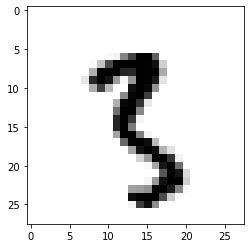

Значение сети: 9


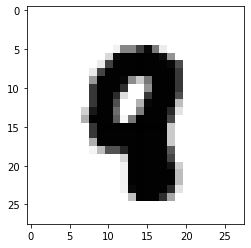

Значение сети: 4


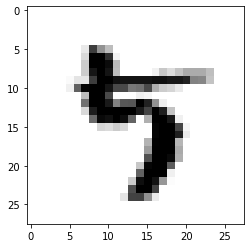

Значение сети: 2


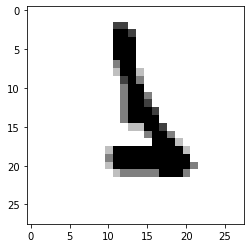

In [26]:
plt.figure(figsize=(10,5))
for i in range(25):
    print("Значение сети: "+str(p_false[i]))
    #plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()